#Zip file path

In [ ]:
filepath = "/content/drive/MyDrive/Colab Notebooks/Datasets/Rice Image Dataset.zip"

#Extracting the zip file

In [ ]:
from zipfile import ZipFile

with ZipFile(filepath) as f:
  f.extractall("./RiceImagedataset")
  print("Data extracted")

Data extracted


#Importing the required modules

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import numpy as np

#Loading the saved model and taking the classes

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/RiceImage.h5")
classes = [
    "Arborio",
    "Basmati",
    "Ipsala",
    "Jasmine",
    "Karacadag"
]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 18)        1368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 18)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 18)        2934      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 36)          5868      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 36)         0

#Opening the image

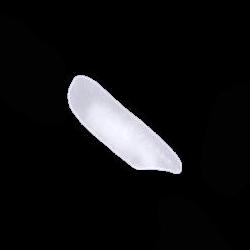

In [47]:
image = Image.open("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Jasmine/Jasmine (9).jpg")
image

#Image resize

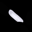

In [48]:
image = image.resize((32,32))
image

#Creating a function for prediction of model

In [49]:
def Pred(final):
  image = Image.open(final)
  image = image.resize((32,32))
  test = tf.reshape(tf.constant(np.array(image)/255), (-1,32,32,3))
  preds = model.predict(test, verbose=False)[0]*100
  preds = tf.math.round(preds)
  confidence = tf.reduce_max(preds)
  index = int(tf.where(preds == confidence)[0][0])
  pred = classes[index]
  return f"The type of rice is {pred.title()} and it's confidence is {int(confidence)}%"

#Prediction of Arborio Rice

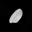

In [59]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Arborio/Arborio (12).jpg")
img = img.resize((32,32))
img

In [60]:
Pred("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Arborio/Arborio (12).jpg")

"The type of rice is Arborio and it's confidence is 100%"

#Prediction of Basmati rice

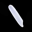

In [61]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Basmati/basmati (15).jpg")
img = img.resize((32,32))
img

In [51]:
Pred("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Basmati/basmati (15).jpg")

"The type of rice is Basmati and it's confidence is 100%"

#Prediction of Ipsala rice

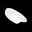

In [62]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Ipsala/Ipsala (10).jpg")
img = img.resize((32,32))
img

In [52]:
Pred("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Ipsala/Ipsala (10).jpg")

"The type of rice is Ipsala and it's confidence is 100%"

#Prediction of Jasmine rice

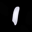

In [63]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Jasmine/Jasmine (8).jpg")
img = img.resize((32,32))
img

In [64]:
Pred("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Jasmine/Jasmine (8).jpg")

"The type of rice is Jasmine and it's confidence is 100%"

#Prediction of Karacadag rice

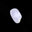

In [65]:
img = Image.open("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Karacadag/Karacadag (1).jpg")
img = img.resize((32,32))
img

In [66]:
Pred("/content/drive/MyDrive/Colab Notebooks/Datasets/train/Karacadag/Karacadag (1).jpg")

"The type of rice is Karacadag and it's confidence is 100%"